# Packaging ML Models

- Agenda
  - Learn Modularization Approach for Code
  - Virtual Environments
  - Serialization and Deserialization of ML Models
  - Packaging in Python
  - Develop, Build and Deploy ML Packages

<br>

- Loan Eligibility Dataset
  - Company wants to automate the loan eligibility detection based on the customer details provided in an Online Application For
  - Each row need to be `classified` as loan approved or not


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


## Loan Eligibility

In [ ]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set plot style
sns.set()

In [ ]:
# dataset url
url = 'https://raw.githubusercontent.com/manifoldailearning/Complete-MLOps-Bootcamp-v2/main/Packaging-ML-Model/loan_approval_dataset.csv'

# load data
loan_df = pd.read_csv(url)

loan_df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [ ]:
# check column types
print(loan_df.dtypes)

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object


- The majority of the column names have a leading space at the beginning so its going to be removed

In [ ]:
# remove leading spaces from column names
col_names = [name.strip() for name in loan_df.columns]

# check changes
col_names

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

In [ ]:
# rename df cols
loan_df.columns = col_names

# check changes
print(loan_df.dtypes)

loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object


In [ ]:
# check for null values
print(loan_df.isnull().sum())

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


- As we can see there are NO Null values in the dataset


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Categorical Variables

- **Education**

In [ ]:
# education value counts
education = loan_df['education'].value_counts().reset_index()

# create % col
education['%'] = np.round((education['count'] / len(loan_df)) * 100, 1)

education

,education,count,%
0,Graduate,2144,50.2
1,Not Graduate,2125,49.8


- As it can be seen, $50.2 \%$ of loan applicants have graduate studies while the remaining $49.8 \%$ don't

<br>

- **Self Employed**

In [ ]:
# function to create value counts of categorical variable
def category_counts(df, col_name):

  # store value counts
  feature = df[col_name].value_counts().reset_index()
  # create % col
  feature['%'] = np.round((feature['count'] / len(df)) * 100, 1)

  return feature


# self employed
self_employed = category_counts(loan_df, 'self_employed'); self_employed


,self_employed,count,%
0,Yes,2150,50.4
1,No,2119,49.6


- As is shown above, $50.4\%$ of loan applicants are self employed while the remaining $49.6\%$ are employed

<br>

- **Loan Status**

In [ ]:
# loan_status counts
loan_status = category_counts(loan_df, 'loan_status'); loan_status

,loan_status,count,%
0,Approved,2656,62.2
1,Rejected,1613,37.8


- During the time period analyzed:
  - $62.2\%$ of the applicants got their loan apporved by the finantial institution
  - The remaining $37.8\%$ got their loan rejected

In [ ]:
num_dependents = category_counts(loan_df, 'no_of_dependents'); num_dependents

,no_of_dependents,count,%
0,4,752,17.6
1,3,727,17.0
2,0,712,16.7
3,2,708,16.6
4,1,697,16.3
5,5,673,15.8



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### Numerical Variables

- **Loan Dependents**

In [ ]:
# descriptive stats
print(loan_df.no_of_dependents.describe())

count    4269.000000
mean        2.498712
std         1.695910
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: no_of_dependents, dtype: float64


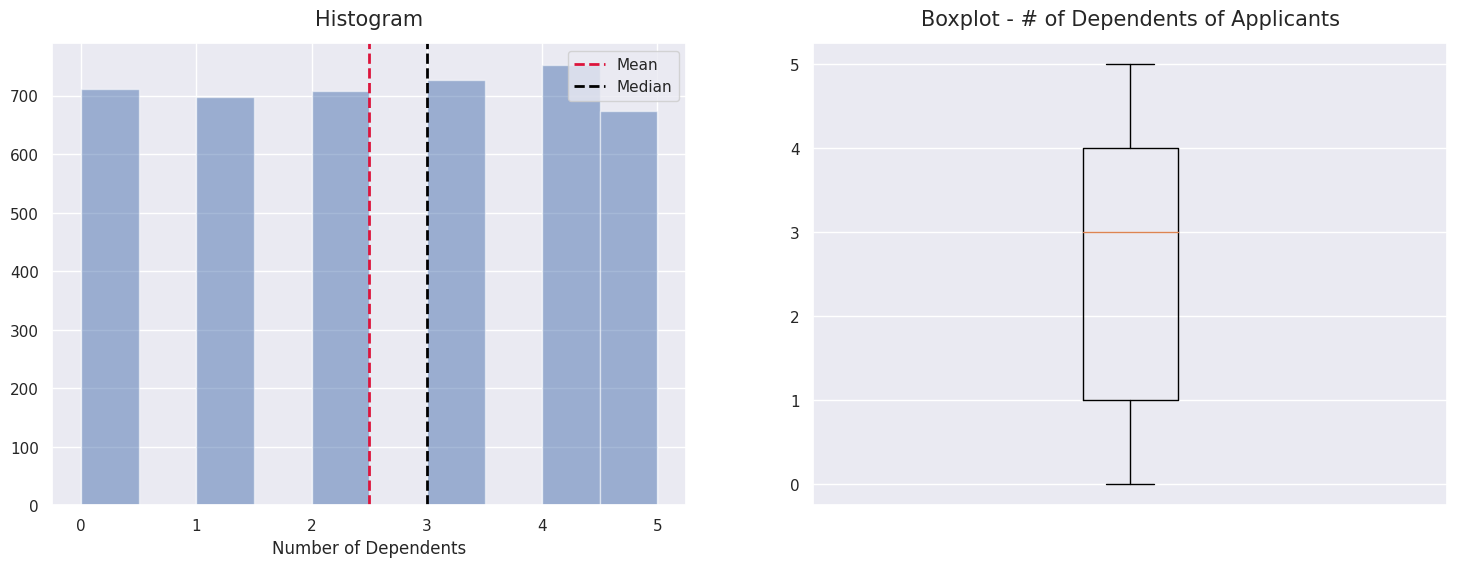

In [ ]:
# plots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# HISTOGRAM
axs[0].hist(x=loan_df.no_of_dependents, alpha=0.5)
# mean
axs[0].axvline(x=loan_df.no_of_dependents.mean(), ls='dashed', lw=2, color='crimson', label='Mean')
# median
axs[0].axvline(x=loan_df.no_of_dependents.median(), ls='dashed', lw=2, color='black', label='Median')

axs[0].set_xlabel('Number of Dependents')
axs[0].legend()
axs[0].set_title('Histogram', pad=13, size=15)

# BOXPLOT
axs[1].boxplot(x=loan_df.no_of_dependents)

axs[1].set_xticks([])
axs[1].set_title('Boxplot - # of Dependents of Applicants', pad=13, size=15)

plt.show()

- As it can be seen on the plots above:
  - $50\%$ of loan applicants have at most 3 persons that are dependent of them
  - $25\%$ of applicants during the time period analyzed have 4 dependents or more

<br>

- **Loan Term**

In [ ]:
# descriptive stats
print(loan_df.loan_term.describe())

count    4269.000000
mean       10.900445
std         5.709187
min         2.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        20.000000
Name: loan_term, dtype: float64


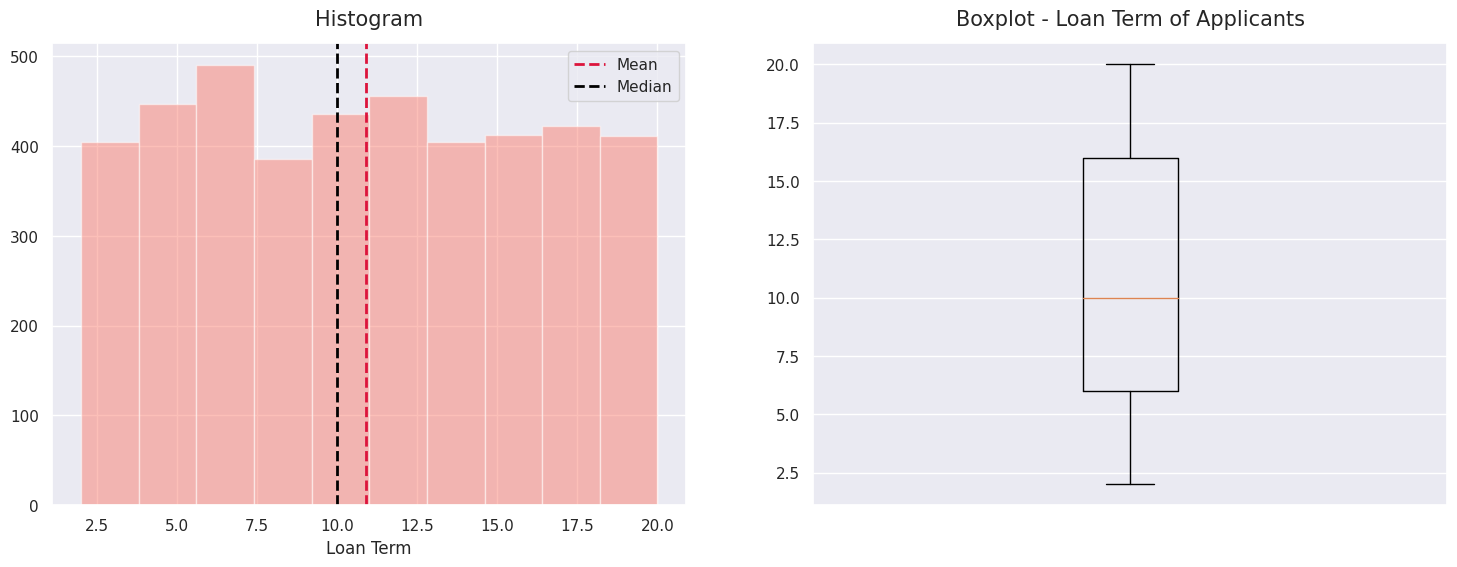

In [ ]:
# plots
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# HISTOGRAM
axs[0].hist(x=loan_df.loan_term, color='salmon', alpha=0.5)
# mean
axs[0].axvline(x=loan_df.loan_term.mean(), ls='dashed', lw=2, color='crimson', label='Mean')
# median
axs[0].axvline(x=loan_df.loan_term.median(), ls='dashed', lw=2, color='black', label='Median')

axs[0].set_xlabel('Loan Term')
axs[0].legend()
axs[0].set_title('Histogram', pad=13, size=15)

# BOXPLOT
axs[1].boxplot(x=loan_df.loan_term)

axs[1].set_xticks([])
axs[1].set_title('Boxplot - Loan Term of Applicants', pad=13, size=15)

plt.show()

- The plots above show:
  - On Average the loan term of the applicants during the time period analyzed was of 10.9 periods
  - $50\%$ of applicants had a loan time of at least 10 periods
  - $25\%$ of applicants has a loan time between 16 and 20 periods

<br>

- **Annual Income**

In [ ]:
# function to plot numeric vars
def plot_numeric(df, col_name):

  # feature var
  feature = df[col_name]

  # plot charts by loan_status
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

  # HISTOGRAM
  sns.histplot(data=df, x=col_name, kde=True, hue='loan_status', ax=ax1)

  ax1.set_title(f'Histogram of {col_name}', pad=13, size=15)

  # BOXPLOT
  sns.boxplot(data=df, y=col_name, x='loan_status', hue='loan_status', ax=ax2)

  ax2.set_xlabel('Loan Status')
  ax2.set_ylabel('')
  ax2.set_title(f'Boxplot of {col_name}', pad=13, size=15)

  plt.show()



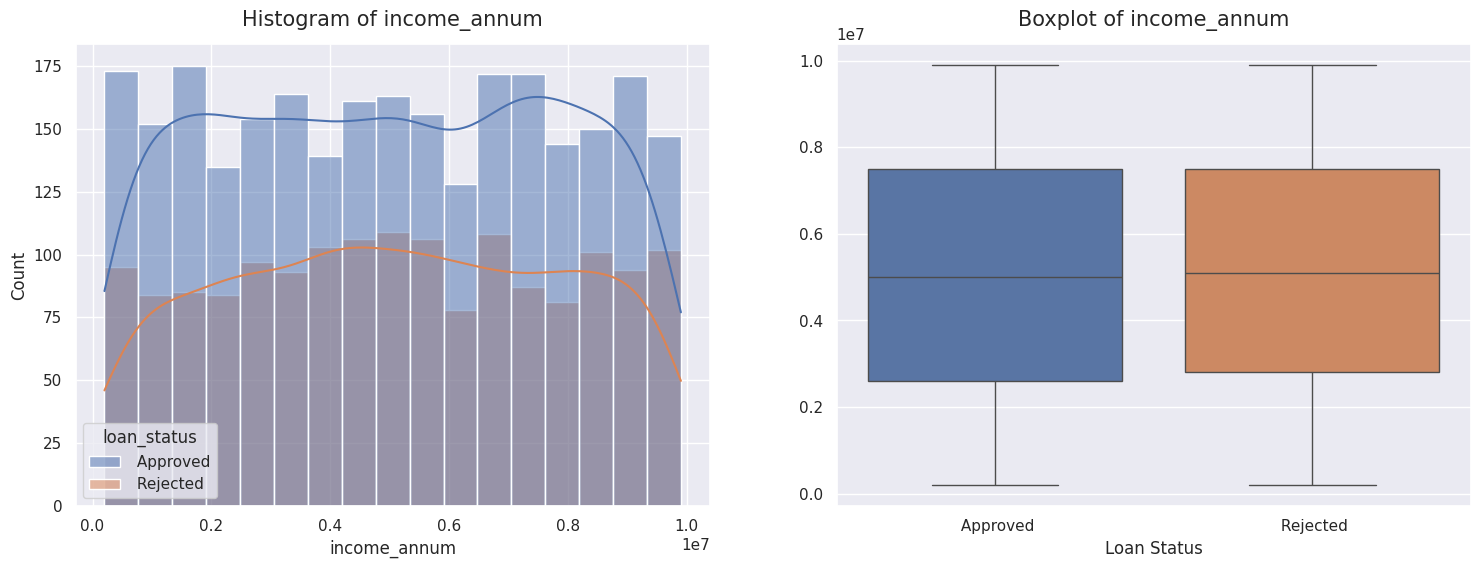

In [ ]:
# function with annual income
plot_numeric(loan_df, 'income_annum')

- **Loan Amount**

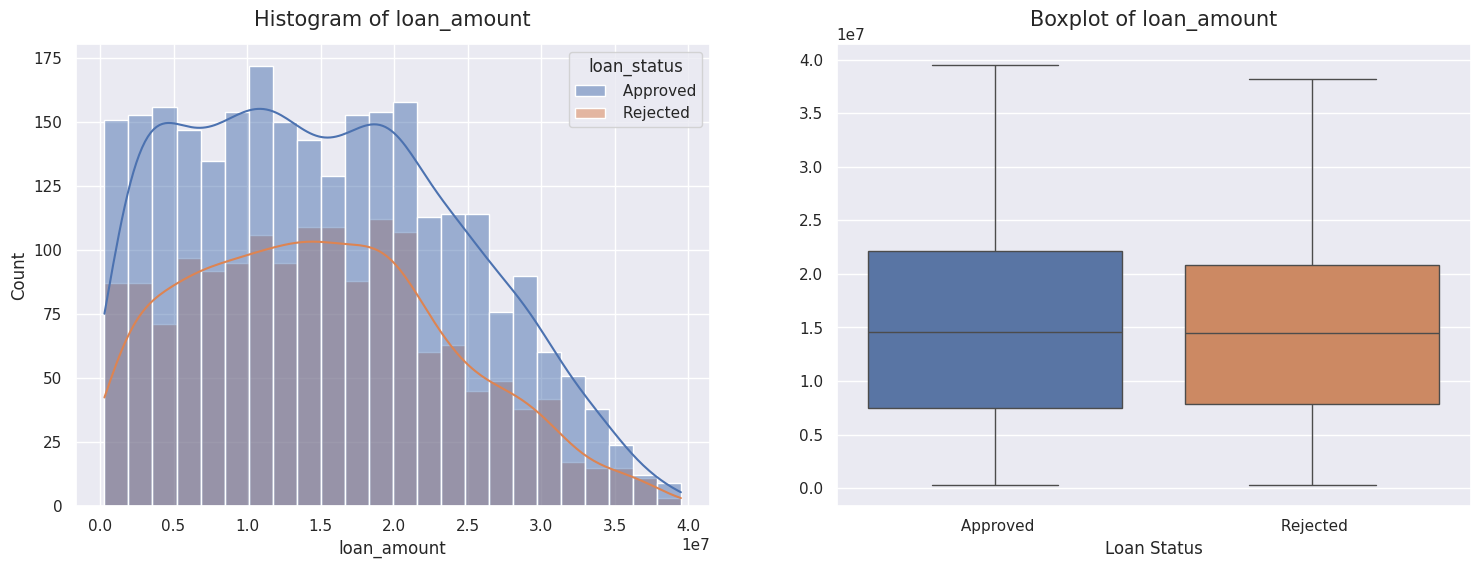

In [ ]:
# plot loan_amount
plot_numeric(loan_df, 'loan_amount')

- **Cibil Score**

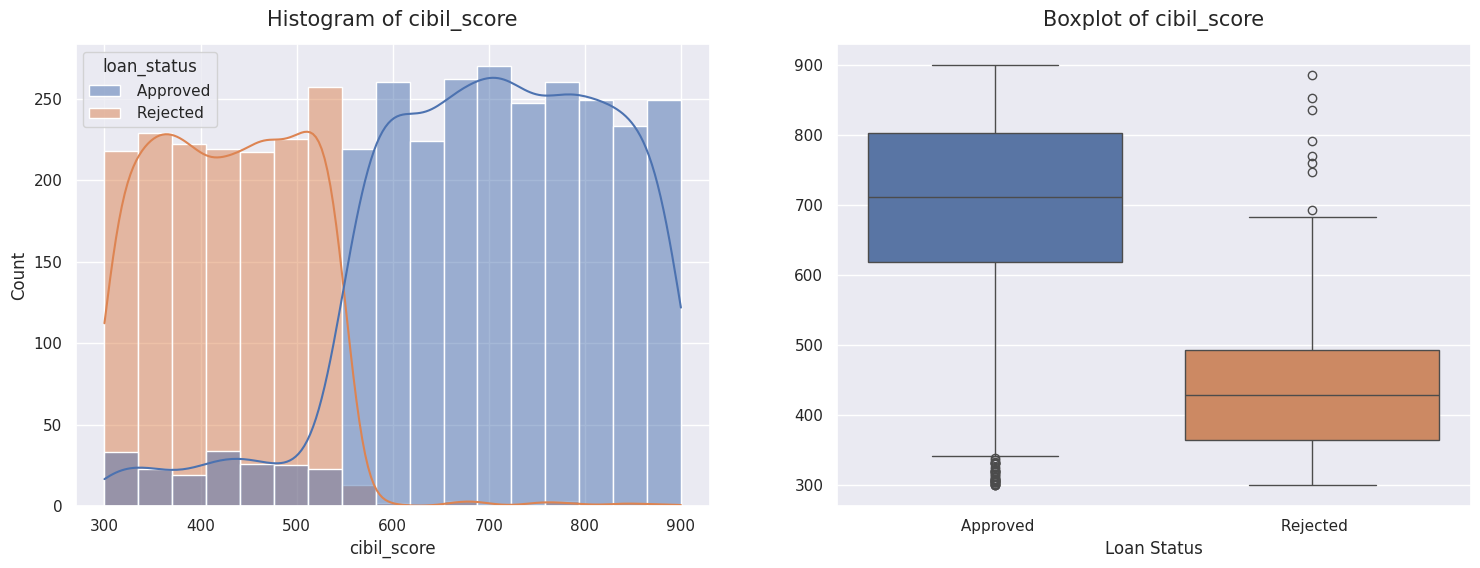

In [ ]:
# plot cibil_score
plot_numeric(loan_df, 'cibil_score')

- **Residential Assets Value**

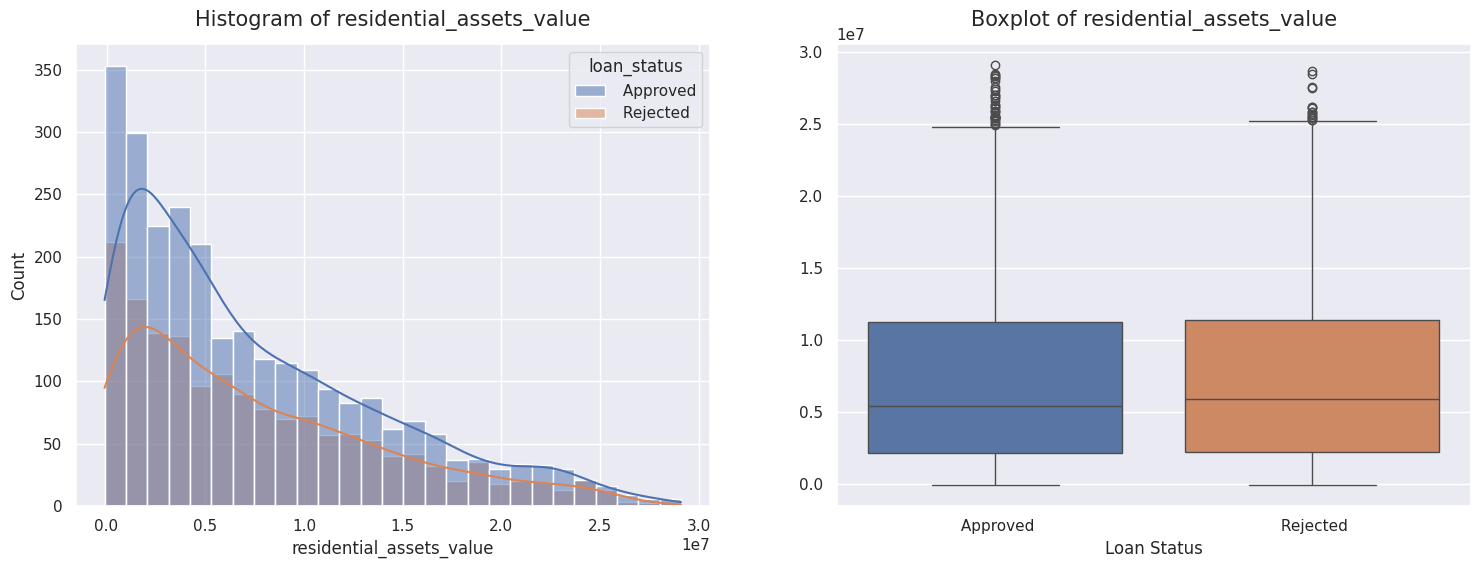

In [ ]:
# plot residential_assets_value
plot_numeric(loan_df, 'residential_assets_value')

- **Commercial Assets Value**

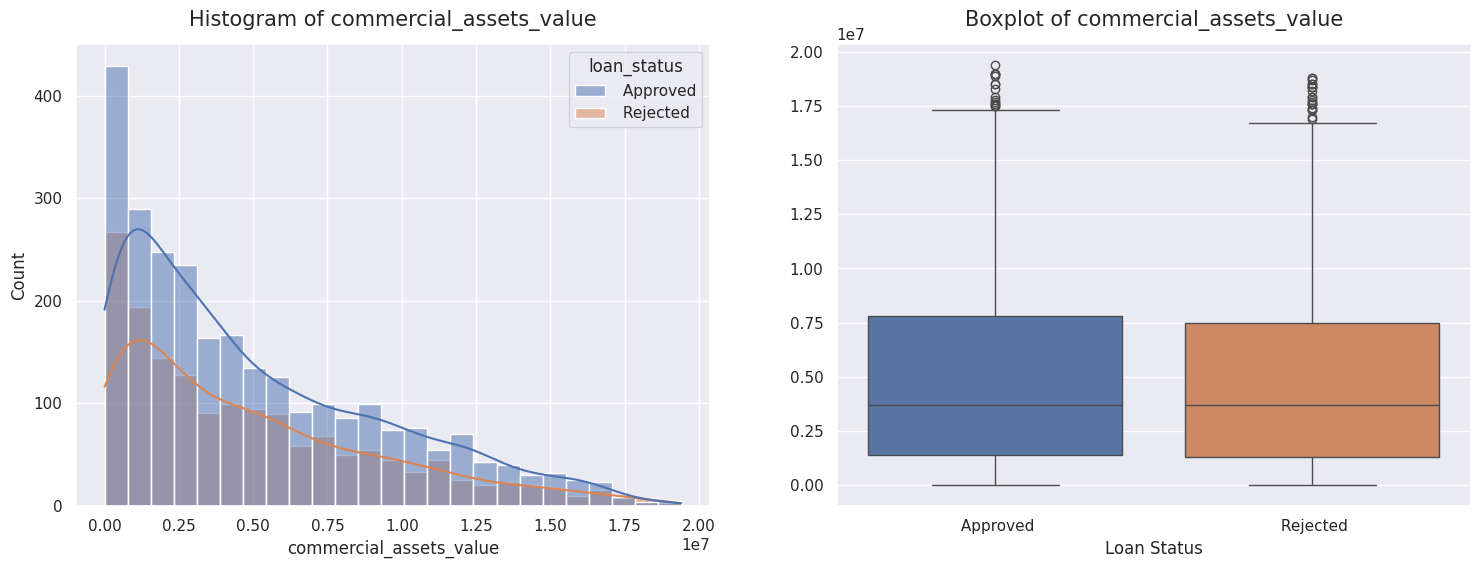

In [ ]:
# plot commercial_assets_value
plot_numeric(loan_df, 'commercial_assets_value')

- **Luxury Assets Value**

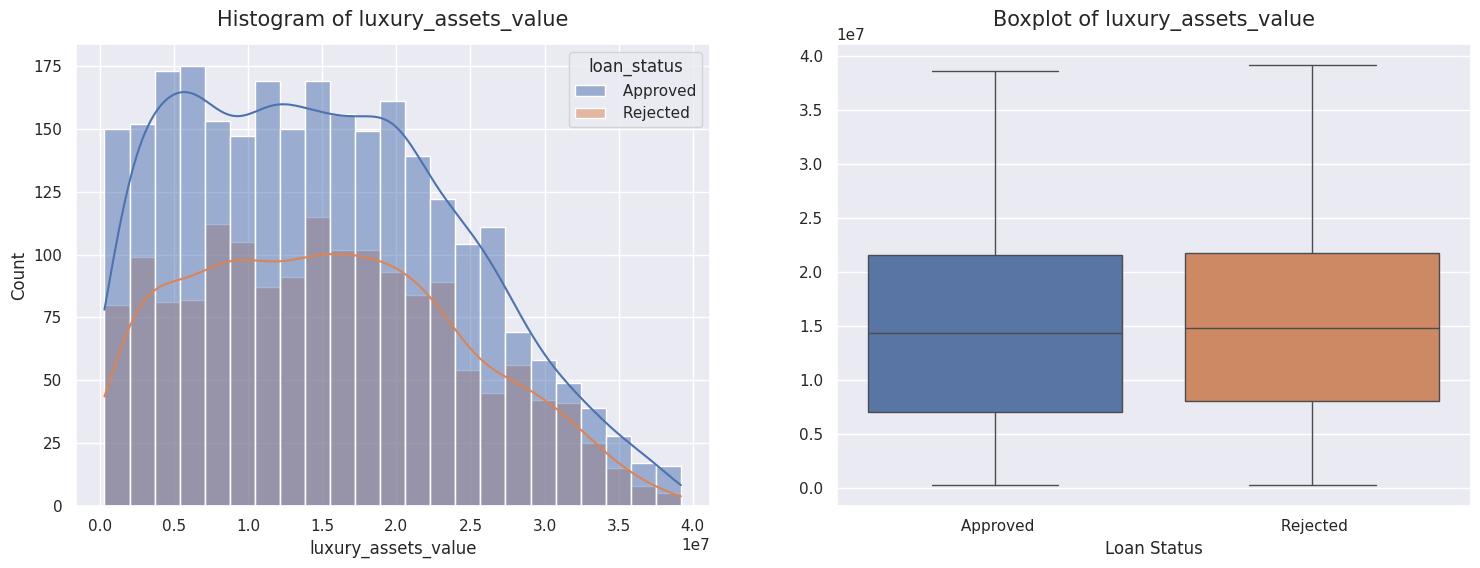

In [ ]:
# plot luxury_assets_value
plot_numeric(loan_df, 'luxury_assets_value')

- **Bank Asset Value**

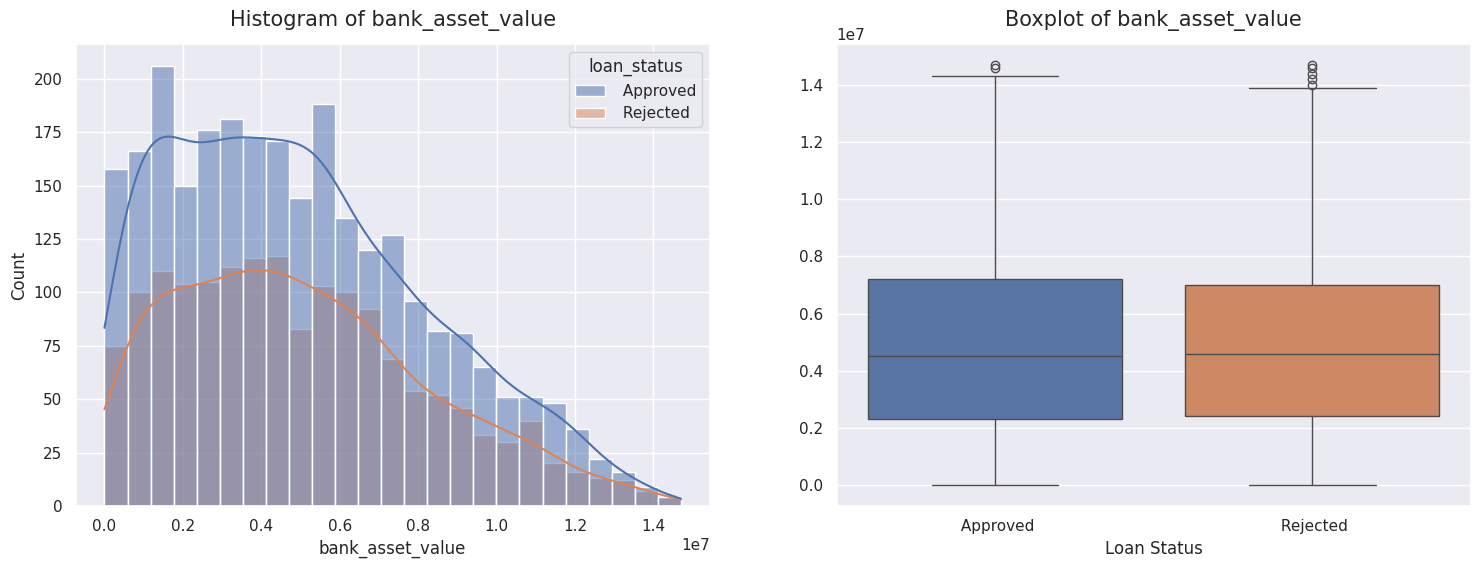

In [ ]:
# plot bank_asset_value
plot_numeric(loan_df, 'bank_asset_value')

- **Total Assets Value**
  - Create a new feature that adds all Asset Value of the Applicant

In [ ]:
# total_assets_value col
loan_df['total_assets_value'] = loan_df['residential_assets_value'] + loan_df['commercial_assets_value'] + \
                                loan_df['luxury_assets_value'] + loan_df['bank_asset_value']


# check changes
loan_df[['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value',
         'bank_asset_value', 'total_assets_value']]

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value
0,2400000,17600000,22700000,8000000,50700000
1,2700000,2200000,8800000,3300000,17000000
2,7100000,4500000,33300000,12800000,57700000
3,18200000,3300000,23300000,7900000,52700000
4,12400000,8200000,29400000,5000000,55000000
...,...,...,...,...,...
4264,2800000,500000,3300000,800000,7400000
4265,4200000,2900000,11000000,1900000,20000000
4266,1200000,12400000,18100000,7300000,39000000
4267,8200000,700000,14100000,5800000,28800000


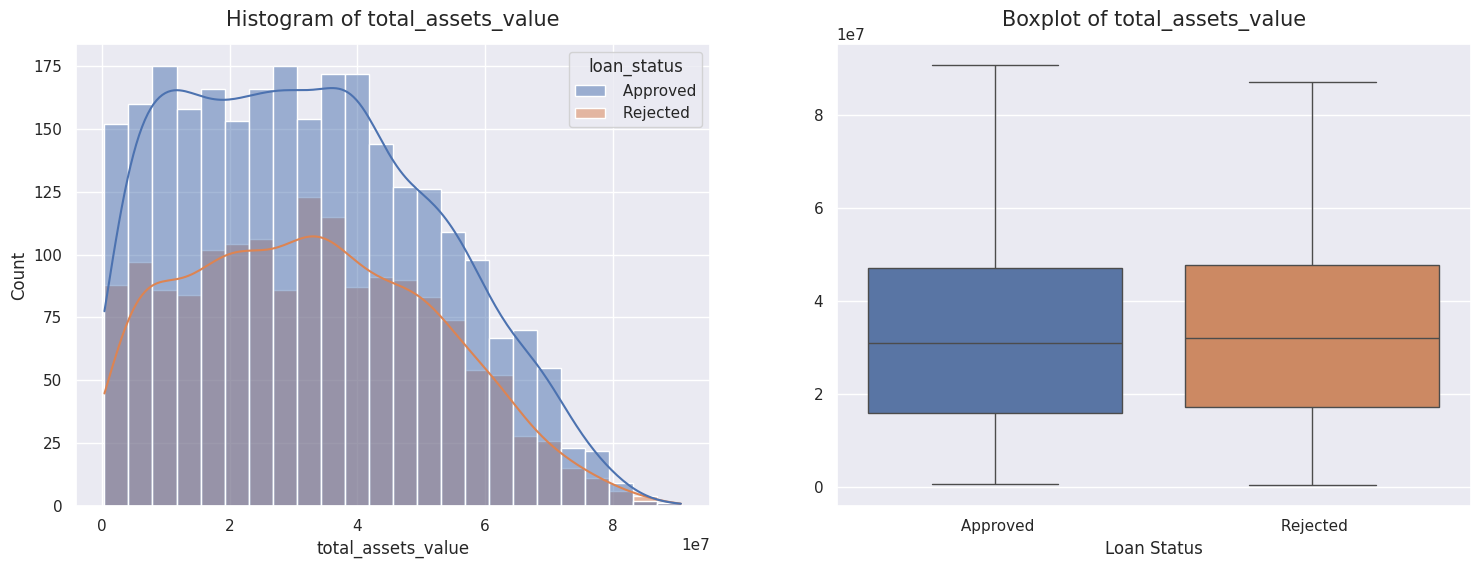

In [ ]:
# plot total_assets_value
plot_numeric(loan_df, 'total_assets_value')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Encoding of Categorical Features

- The features `education` and `self_employed` are going to be encoded to:
  - `has_graduate_edu`
    - 1 if True 0 if False

  - `is_self_employed`
    - 1 if True 0 if False

In [ ]:
# has_graduate_edu col
loan_df['has_graduate_edu'] = np.where(loan_df.education == ' Graduate', 1, 0)

# is_self_employed col
loan_df['is_self_employed'] = np.where(loan_df.self_employed == ' Yes', 1, 0)

# check changes
loan_df[['education', 'has_graduate_edu', 'self_employed', 'is_self_employed']]


,education,has_graduate_edu,self_employed,is_self_employed
0,Graduate,1,No,0
1,Not Graduate,0,Yes,1
2,Graduate,1,No,0
3,Graduate,1,No,0
4,Not Graduate,0,Yes,1
...,...,...,...,...
4264,Graduate,1,Yes,1
4265,Not Graduate,0,Yes,1
4266,Not Graduate,0,No,0
4267,Not Graduate,0,No,0


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Normalization of Numeric Features

In [ ]:
# descriptive stats
loan_df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,total_assets_value,has_graduate_edu,is_self_employed
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000,4269.000000
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,3.254877e+07,0.502225,0.503631
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,1.950656e+07,0.500054,0.500045
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,4.000000e+05,0.000000,0.000000
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,1.630000e+07,0.000000,0.000000
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,3.150000e+07,1.000000,1.000000
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,4.720000e+07,1.000000,1.000000
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,9.070000e+07,1.000000,1.000000


- As it can be seen, the numeric features are in different ranges so they need to be normalized
  - A `Min Max` normalization is going to be used
  - The range of the numeric features will now be $[0, 1]$

  <br>

  $$ X_{Norm} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

  <bR>

In [ ]:
# select X features
X_features = loan_df.loc[:, ~loan_df.columns.isin(['loan_id', 'education', 'self_employed', 'loan_status',
                                                   'residential_assets_value', 'commercial_assets_value',
                                                   'luxury_assets_value', 'bank_asset_value'])]


X_features

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,total_assets_value,has_graduate_edu,is_self_employed
0,2,9600000,29900000,12,778,50700000,1,0
1,0,4100000,12200000,8,417,17000000,0,1
2,3,9100000,29700000,20,506,57700000,1,0
3,3,8200000,30700000,8,467,52700000,1,0
4,5,9800000,24200000,20,382,55000000,0,1
...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,7400000,1,1
4265,0,3300000,11300000,20,559,20000000,0,1
4266,2,6500000,23900000,18,457,39000000,0,0
4267,1,4100000,12800000,8,780,28800000,0,0


In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# create instance of scaler
scaler = MinMaxScaler()

# fit data
scaled_model = scaler.fit(X_features)

# scaled data
X_scaled = scaled_model.transform(X_features)

# check shape
print(f'X_scaled shape: {X_scaled.shape}')

# first 10 rows and 5 cols
X_scaled[:10, :5]

X_scaled shape: (4269, 8)


array([[0.4       , 0.96907216, 0.75510204, 0.55555556, 0.79666667],
       [0.        , 0.40206186, 0.30357143, 0.33333333, 0.195     ],
       [0.6       , 0.91752577, 0.75      , 1.        , 0.34333333],
       [0.6       , 0.82474227, 0.7755102 , 0.33333333, 0.27833333],
       [1.        , 0.98969072, 0.60969388, 1.        , 0.13666667],
       [0.        , 0.4742268 , 0.33673469, 0.44444444, 0.03166667],
       [1.        , 0.87628866, 0.83418367, 0.11111111, 0.63      ],
       [0.4       , 0.56701031, 0.375     , 1.        , 0.13666667],
       [0.        , 0.06185567, 0.04846939, 1.        , 0.80333333],
       [1.        , 0.09278351, 0.10204082, 0.44444444, 0.14666667]])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### $Y$ Labels

- $1:$ Loan was approved
- $0:$ Loan was rejected

In [ ]:
# Y
Y = np.where(loan_df.loan_status == ' Approved', 1, 0)

# check Y shape
print(f'Y shape: {Y.shape}', '\n')

Y

Y shape: (4269,) 



array([1, 0, 0, ..., 0, 1, 1])

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

### Model Creation

- Logistic Regression Model

  <br>

  $$ \sigma(z) = \frac{1}{1 + e^{z}} $$

  <br>


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


- Train Test Split

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_features, Y, test_size=0.3, random_state=0)

# check train shape
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}', '\n')


# check test shape
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')



x_train shape: (2988, 8)
y_train shape: (2988,) 

x_test shape: (1281, 8)
y_test shape: (1281,)



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


- Model Training

In [ ]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

# create instance of model
log_model = LogisticRegression()

# train model
log_model.fit(x_train, y_train)

LogisticRegression()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


- Model Testing

In [ ]:
# predictions
y_predi = log_model.predict(x_test)

# first 10 prediction
y_predi[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
# predicted probabilities
y_predi_prob = log_model.predict_proba(x_test)

# first 10
y_predi_prob[:10]

array([[0.30557323, 0.69442677],
       [0.1347909 , 0.8652091 ],
       [0.47172037, 0.52827963],
       [0.59304342, 0.40695658],
       [0.45825645, 0.54174355],
       [0.405887  , 0.594113  ],
       [0.05351573, 0.94648427],
       [0.32813647, 0.67186353],
       [0.2976469 , 0.7023531 ],
       [0.79642411, 0.20357589]])

In [ ]:
# classification report
from sklearn.metrics import classification_report

print('Classification Report of Logistic Regression Model for Loan Apporval:', '\n')
print(classification_report(y_test, y_predi))

Classification Report of Logistic Regression Model for Loan Apporval: 

              precision    recall  f1-score   support

           0       0.83      0.59      0.69       506
           1       0.77      0.92      0.84       775

    accuracy                           0.79      1281
   macro avg       0.80      0.75      0.76      1281
weighted avg       0.79      0.79      0.78      1281



- As it can be seen, the model doesn't have a good performance in predicting loan approval status for new data
  - It predicted all instances in the positive class

  - `Precision: 0.61`
    - Value between 0 and 1 that measures how many of the psoitive predictions of the model are correct
    - The model has a tendency of classifying instances in the positive class when they are NOT

  <bR>

  - `Recall: 1.0`
    - Value between 0 and 1 how mnay of the positive instances the model is able to classify correctly
    - Since the model predicted almost all instances in the positive class it has a perfect Recall


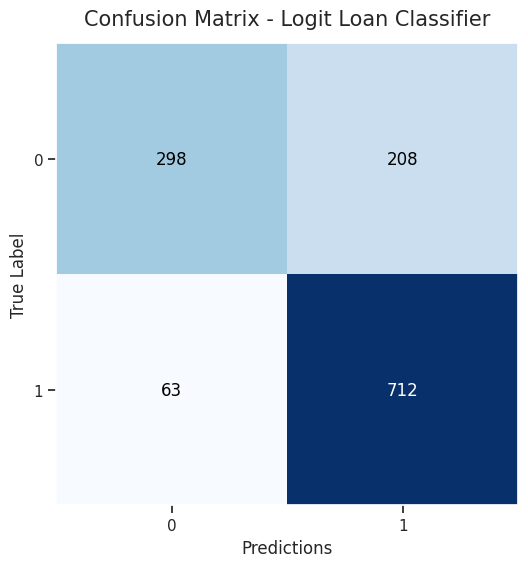

In [ ]:
# import confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# confusion matrix
cm_logit = confusion_matrix(y_test, y_predi)

# plot
plot_confusion_matrix(conf_mat=cm_logit, figsize=(6, 6))

plt.xlabel('Predictions')
plt.ylabel('True Label')

plt.title('Confusion Matrix - Logit Loan Classifier', pad=13, size=15)

plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Serialization and Deserialization

- To create a business impact I need to productionalize the ML Model
  - Use it as part of my software/product


<br>

- We need to ensure that the version used in the experiment / training needs to be the same as the one used in Production
  - ENSURE this by creating a `Virtual Environment` per project
  - Create a `Requirement File`
    - Text file that contains all the packages with their respective versions used in the virtual environment
    - `pip freeze > requirements.txt`
    -  **To install requirements:**
      - `pip install -r requiremnents.txt`

  <br>

  - SERIALIZATION & DESERIALIZATION of the ML Model
    - Python object hierarchy is converted into a `pystring`
      - Model Object will be stored as a file
      - Allows the model to be transfered between environments
      - `joblib Library`
   

In [ ]:
# import joblib
import joblib

# serialize model >> save model as a file
joblib.dump(log_model, 'loan_approval_logit.pkl')

['loan_approval_logit.pkl']

In [ ]:
# deserialization >> load model
loaded_model = joblib.load('loan_approval_logit.pkl')

# trained model coefficients
print('Loaded model coefficients:')
print(loaded_model.coef_, '\n')

# trained model intercept
print('Trained model intercept')
print(loaded_model.intercept_)

Loaded model coefficients:
[[-3.29764140e-02 -4.80847732e-07  6.16649318e-08 -1.96611727e-01
   7.86946159e-03  7.24740392e-09 -6.70957328e-03 -5.78782501e-03]] 

Trained model intercept
[-0.01270674]


- **Before sharing the model file with the deployment team we need to create a `TEST SCRIPT`**
  - Ensures that the model is working as expected
  - Use `pytest library`

  <br>

  - This can NOT be done inside a Python Notebook
    - Difficult to debug
    - **NO Modularity in the Code**
      - Splitting code into different files so it can be executed independently

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Modular Programming

- `Modular Programming` is an approach where code is divided into separate files
  - Each file has everything necessary to execute a defined piece of logic and return an expected output when imported by other files as input

  <br>

  - `Module`
    - Python file that can hold classes, functions and variables

  <br>

  - `Package`
    - One or more `modules` that are interlinked with each other
    - A directory with subdirectories that contains a `__init__.py` file
      - `from PackageA.Sub_A import func_5`

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Package Management in Python

- `Packages:`
  - Self contained collections of Python modules, libraries, and other resources that provide resuable functionality for your projects
  - Modularity ⟶ BREAK DOWN complex code into manageable units, making projects easier to organize and maintain

  <br>

  - `PyPI` ⟶ Python Package Index
    - Primary repository for 3rd party packages
    - Vast collection of open-source tools and libraries

  <br>

  - `pip` ⟶ Package Installer
    - Standard tool for installing, removing and managing Python packages
      - `pip install`
      - `pip uninstall`
      - `pip list`

  <br>

  - `setup.py`
    - Cornerstone file for Python package configuration
    - Contains metadata and installation instructions of the package

  <br>

- `Virtual Environments`
  - ISOLATED python environments to manage different sets of packages for different projects
  - Projects are self contained
  - Prevents conflicts arising from incompatible package versions

  <br>

- `BEST PRACTICES`
  - `requirements.txt`
    - Text file listing ALL the project's direct dependencies for easy installation and reproducibility
    - Consider specifying exact package versions for extra control over dependencies
  - `Virtual Environment`
    - Avoid global package pollution and keep projects independent

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Project Structure

hello-world >> Folder (Hoolds Python Project)
  - hello_world >> Top Level Directory
    - `__init__.py` >> Module
    - `main.py` >> Module

<br>

# Virtual Environment Creation

- Go to folder directory >> windows use miniconda
  - `conda create -n envi_name python=3.10`
  - `conda activate hellodemo`

<bR>

# Setup Tools >> Allows to create packages
  - `pip install setuptools twine`

  - Create setup.py file >> On Package Base dir
    - python setup.py sdist
      - creates source distribution of package
      - dist directory with installable package (.tar.gz)
      - test installing it with pip install

  <br>

  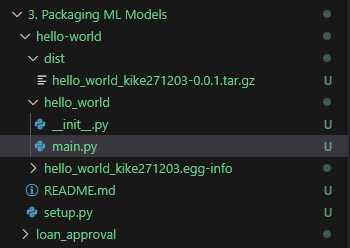

  <br>

  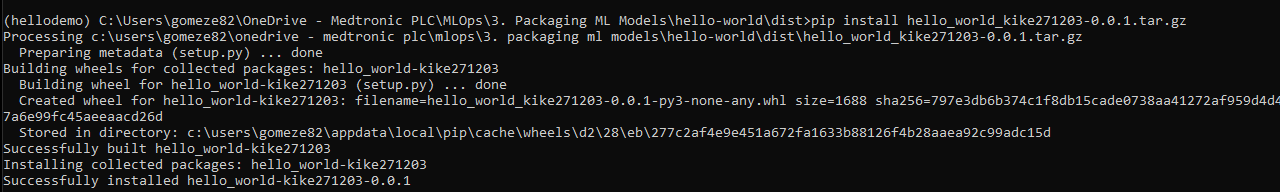

  <br>

  - Import `multiply` module from `hello_world`

  <br>

  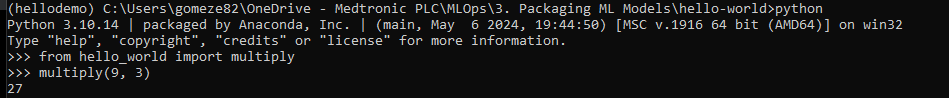

  <br>

# To Upload package to PyPI we use twine >> Test Server

- `twine upload --repository-url https://test.pypi.org/legacy/ dist/*`

    - Create Account
        - username: Kike1027
        - password: TestPypi1027%
        
    - API Token is needed whenever we push something from our
       local system to the server
    - `pypi-AgENdGVzdC5weXBpLm9yZwIkYmIyMjcxNGQtNTU1OC00OGE1LWE0NzAtOGVhYTJjYmNmZDdiAAIqWzMsImM3ZjE2ZjZmLWEwNWItNGJhYS04ZDA0LWY4YTUzYTdjZTcyMSJdAAAGIEcqTbLVF8S3Rr_E-G0YqZYIbSHz_-QlNIgHTO53G2SH`

    <br>

    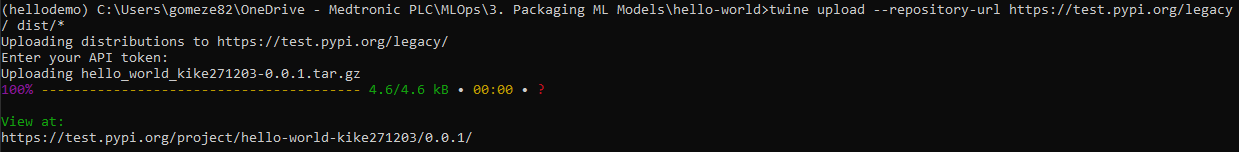

    <br>

    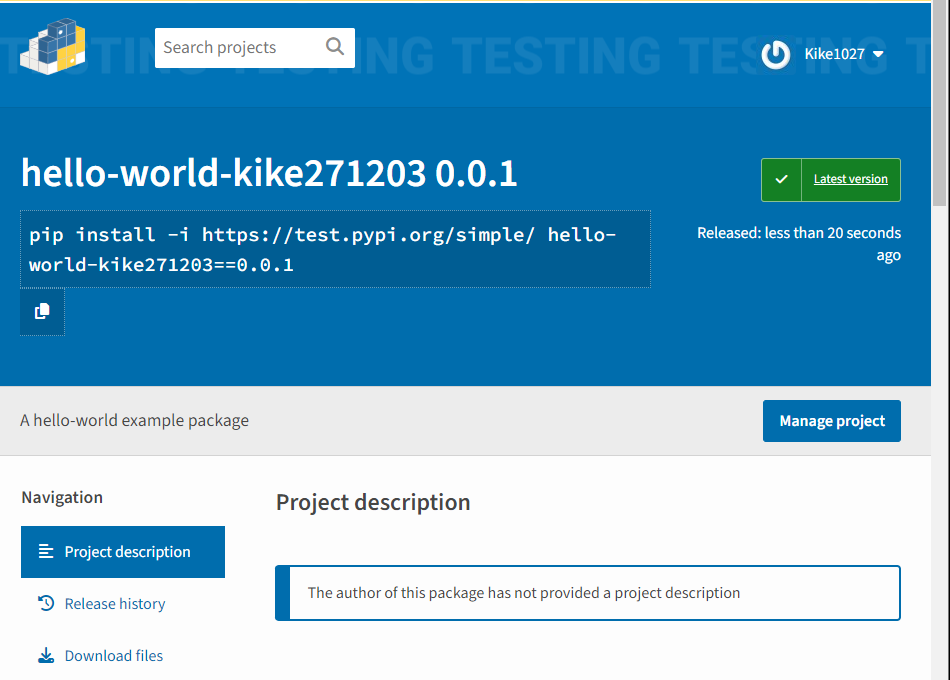

    <br>

  - To install package:
    - `pip install -i https://test.pypi.org/simple/ hello-world-kike271203==0.0.1`




![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Building the ML Model Package

- Steps:
  - Start by creating a `Directory`
    - `loan-package-model`
      - `__init__.py`
      - `setup.py`
      - `README.md`
      - `MANIFEST.in`
        - Allows to includes files to the package ⟶ Training file, Testing file
  - Maintain the separate modules
    - Separate files for `preprocessing, data handling, ...`
  - Build Test Cases
    - Verify the integrity of the model

<br>

- `Source Distribution` is the set of files that will allow the packaging, building and distibution of the modules
  - `python setuo.py sdist`

<br>

- **Is a GOOD idead to create a SINGLE CONFIG file that can hold vaues and refer it in other parts**
  - Mention where data folder is
  - Location of train models
  - Specify Target Column

<br>

- Folder Hierarchy of Project

  <br>

  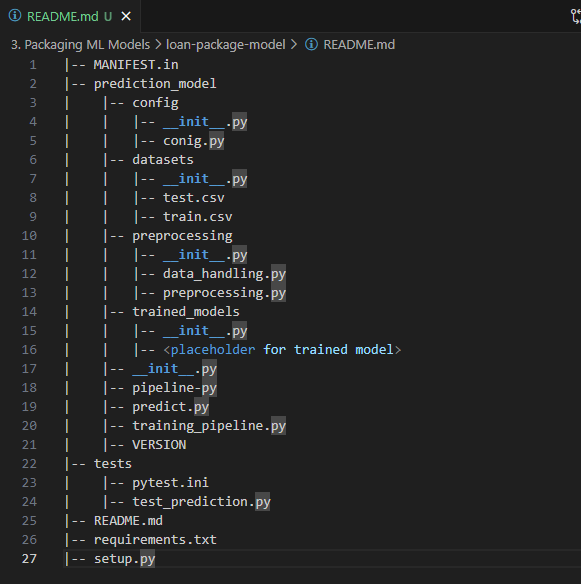

  <br>


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


## Requirements File

- The `requirements.txt` file will provide a list of all the packages, with their respective versions, used in the project
  
  - Ensures that everyone that is using the package has the same modules and versions

  - Use `pip freeze > requirements.txt` to automitacally generate a requirements file on the specified location

  <br>

  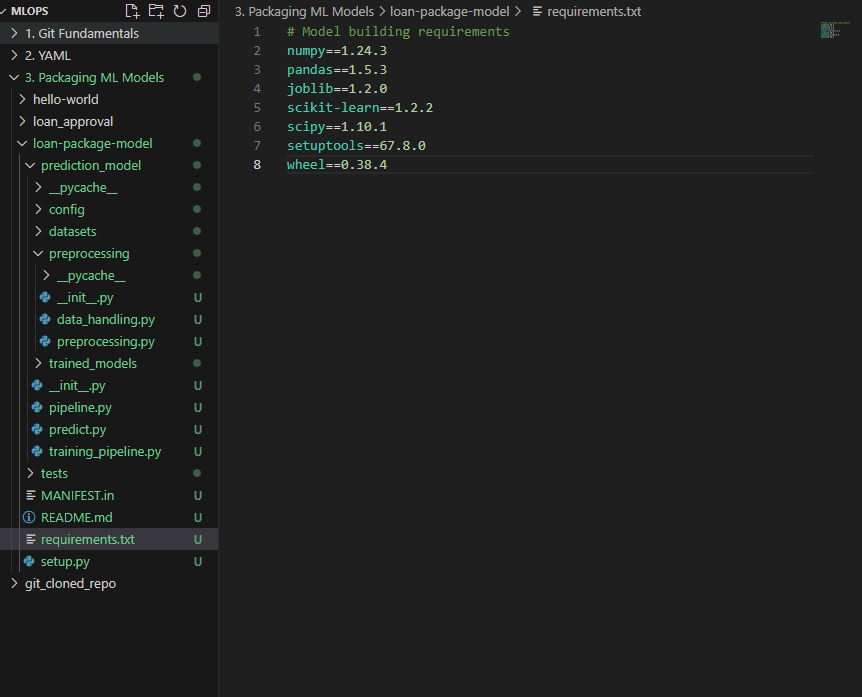

  <br>

  - To INSTALL `requirements.txt` file on a `Conda Environment` use:
    - `conda install --yes --file requirements.txt`


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)